In [3]:
import numpy as np
np.arange(320,620,10)

array([320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440,
       450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570,
       580, 590, 600, 610])

In [4]:
import subprocess
import pandas as pd
import numpy as np

# parameters (change as needed)
mjd_start_values = [57001.416667]
mjd_end_values = [57002]
nspan_values = [300]
ncoeffs_values = [3]
maxha_values = [8.0]
telescope_code_values = ['GMRT']
frequencies = np.arange(320,620,10)

# generate input files for different parameter combinations
with open("output_file.txt", 'w') as file:
    for frequency in frequencies:
        for mjd_start in mjd_start_values:
            for mjd_end in mjd_end_values:
                for nspan in nspan_values:
                    for ncoeffs in ncoeffs_values:
                        for maxha in maxha_values:
                            for telescope_code in telescope_code_values: 
                                    output_file = f"tempo2_input_{mjd_start}_{mjd_end}_{nspan}_{ncoeffs}_{maxha}_{telescope_code}_{frequency}.txt"
                                    parameter_values = [mjd_start, mjd_end, nspan, ncoeffs, maxha, telescope_code, frequency]
                                    line = " ".join(map(str, parameter_values)) + "\n"
                                    file.write(line)

#AWK commands

#To capture the paramaters from the parameter sweep file and run tempo2 polyco on it 
with open("tempo_param_capture.awk", 'r') as awk_file:
    awk_command = awk_file.read()
subprocess.run(f'awk \'{awk_command}\' output_file.txt | sh', shell=True)

#To extract the coefficients and required constants from output of tempo2 to calculate phase and frequency 
#with open("fsweep_extract_coeff.awk", 'r') as awk_file:
    #awk_command = awk_file.read()
#subprocess.run(f'awk \'{awk_command}\' *polyco_new.dat | sh', shell=True)

#Calculate phae and frequency 

def calculate_phase_and_frequency(mjd, tmid, rphase, coeff1, coeff2, coeff3,f0):
    # Calculate the time difference in minutes
    dt = (mjd - tmid) * 1440

    # Calculate phase
    phase = rphase + dt * 60 * f0 + coeff1 + dt * coeff2 + dt**2 * coeff3
    
    norm_phase  = phase% 1
    # Calculate frequency in Hz
    freq = f0+ (1 / 60) * (coeff2 + 2 * dt * coeff3)

    return phase, freq,norm_phase

df=[]
#freq_sweep = [320,322,324,326,330,332,340,380,400]
mjd_input = 57001.43000  # Replace with the desired MJD value
#f0 = 11.188233045354
output_pred = []


for frequ in range(len(frequencies)):
    
    #To extract the coefficients and required constants from output of tempo2 to calculate phase and frequency 
    with open("fsweep_extract_coeff.awk", 'r') as awk_file:
        awk_command = awk_file.read()
        command = f'awk \'{awk_command}\' {frequencies[frequ]}polyco_new.dat'
        subprocess.run(command, shell=True, check=True)
    
    file_path = f'coeff_data_{frequencies[frequ]}.dat'
    df = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=['Pulsar', 'TMID', 'F0','RPHASE', 'COEFF1', 'COEFF2', 'COEFF3'],skiprows=1)
    
    for index, row in df.iterrows():
        psrname, tmid, f0,rphase, coeff1, coeff2, coeff3 = row
        phase,freq,norm_phase = calculate_phase_and_frequency(mjd_input, tmid, rphase, coeff1, coeff2, coeff3,f0)
        output = [psrname,frequencies[frequ],tmid,mjd_input,phase,norm_phase,freq]
        output_pred.append(output)
        print(f"Pulsar: {psrname}, Freq = {frequencies[frequ]}, MJD: {mjd_input}, Phase: {phase}, Frequency: {freq} Hz")



This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under conditions of GPL license.

************************************************* 
************************************************* 
[tempo2Util.C:396] Warning: [CLK3] no clock corrections available for clock UTC(gmrt) for MJD 57001.8
[tempo2Util.C:396] Warning: [CLK4] Trying assuming UTC = UTC(gmrt)
[tempo2Util.C:396] Warning: [CLK9] ... ok, using stated approximation 
[tempo2Util.C:401] Warning: [DUP1] duplicated warnings have been suppressed.
[tempo2Util.C:396] Warning: [CLK6] Proceeding assuming UTC =  UTC(gmrt)
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under conditions of GPL license.

************************************************* 
************************************************* 
[tempo2Util.C:396] Warning: [CLK3] no clock corrections available for clock UTC(gmrt) for MJD 57001.8
[tempo2Util.C:396

In [1]:
#This was done to avoid the running polyco again 
import subprocess
import pandas as pd
import numpy as np
frequencies =np.arange(320,620,10)


In [ ]:
#Calculate phae and frequency 

def calculate_phase_and_frequency(mjd, tmid, rphase, coeff1, coeff2, coeff3,f0):
    # Calculate the time difference in minutes
    dt = (mjd - tmid) * 1440

    # Calculate phase
    phase = rphase + dt * 60 * f0 + coeff1 + dt * coeff2 + dt**2 * coeff3
    
    norm_phase  = phase% 1
    # Calculate frequency in Hz
    freq = f0+ (1 / 60) * (coeff2 + 2 * dt * coeff3)

    return phase, freq,norm_phase

df=[]
#freq_sweep = [320,322,324,326,330,332,340,380,400]
mjd_input = 57001.43000  # Replace with the desired MJD value
#f0 = 11.188233045354
output_pred = []


for frequ in range(len(frequencies)):
    
    #To extract the coefficients and required constants from output of tempo2 to calculate phase and frequency 
    with open("fsweep_extract_coeff.awk", 'r') as awk_file:
        awk_command = awk_file.read()
        command = f'awk \'{awk_command}\' {frequencies[frequ]}polyco_new.dat'
        subprocess.run(command, shell=True, check=True)
    
    file_path = f'coeff_data_{frequencies[frequ]}.dat'
    df = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=['Pulsar', 'TMID', 'F0','RPHASE', 'COEFF1', 'COEFF2', 'COEFF3'],skiprows=1)
    
    for index, row in df.iterrows():
        psrname, tmid, f0,rphase, coeff1, coeff2, coeff3 = row
        phase,freq,norm_phase = calculate_phase_and_frequency(mjd_input, tmid, rphase, coeff1, coeff2, coeff3,f0)
        output = [psrname,frequencies[frequ],tmid,mjd_input,phase,rphase,norm_phase,freq]
        output_pred.append(output)
        print(f"Pulsar: {psrname}, Freq = {frequencies[frequ]}, MJD: {mjd_input}, Phase: {phase}, Frequency: {freq} Hz")

In [3]:
df

,Pulsar,TMID,F0,RPHASE,COEFF1,COEFF2,COEFF3
0,0835-4510,57001.708333,11.188233,6.164273e+08,-0.000028,-0.018113,-3.181877e-07
1,0835-4510,57001.916667,11.188233,6.166286e+08,-0.000171,-0.018745,-1.533151e-06
2,0835-4510,57002.125000,11.188233,6.168300e+08,-0.000059,-0.019469,-5.838204e-07
3,0835-4510,57002.333333,11.188233,6.170314e+08,0.000140,-0.019278,1.114914e-06


In [ ]:
output_pred

In [ ]:
import matplotlib.pyplot as plt

# Extract data
pulsar_names = [output[0] for output in output_pred]
freq_pulsar = [output[6] for output in output_pred]
frequencies = [output[1] for output in output_pred]
t_mid = [output[2] for output in output_pred]
norm_phases = [output[5] for output in output_pred]


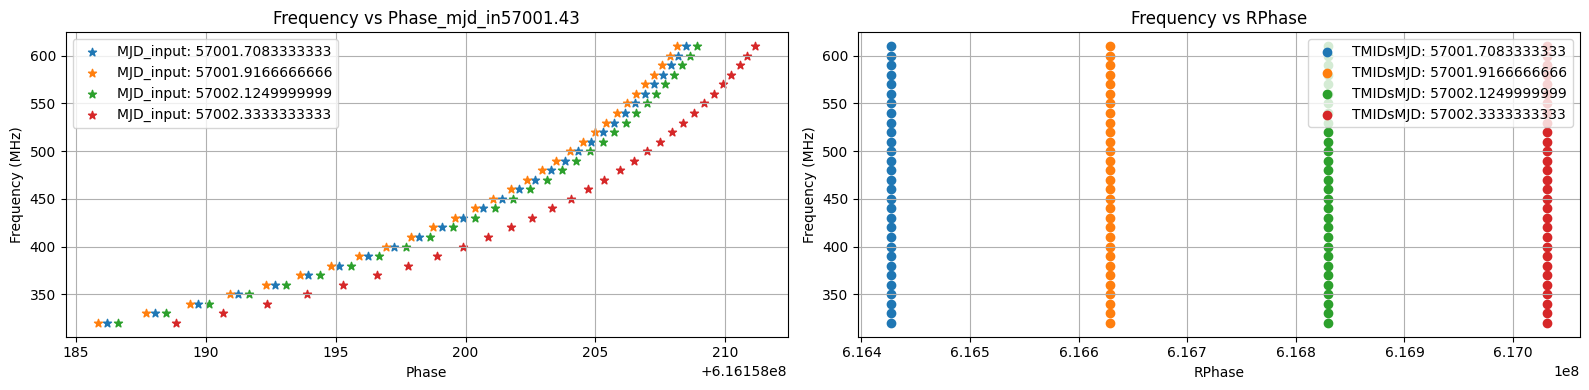

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#mjd_input = 57001.43000  # Replace with the desired MJD value

# Initialize empty lists to store values
freq_values = []
Rphase_values = []
norm_phase_values = []
phase_values_inputmjd=[]
tmids = []

# Your existing loop
for i in range(len(frequencies)):
    freq_values_tmidmjd = output_pred[i][1]
    Rphase_values_tmidmjd = output_pred[i][5]
    phase_values_mjdin = output_pred[i][4]
    #norm_phase_values_tmidmjd = output_pred[i][5]
    tmidmjd = output_pred[i][2]
    
    # Append values to the lists
    freq_values.append(freq_values_tmidmjd)
    phase_values_inputmjd.append(phase_values_mjdin)
    Rphase_values.append(Rphase_values_tmidmjd)
    #norm_phase_values.append(norm_phase_values_tmidmjd)
    tmids.append(tmidmjd)

# Create a DataFrame
#df_result = pd.DataFrame({'Frequency': freq_values,'Phase': Rphase_values,'Norm_Phase': norm_phase_values})

# Get unique MJD values
unique_mjd_values = list(set(tmids))
unique_mjd_values= np.sort(unique_mjd_values)
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Plot the first subplot
axs[0].set_title(f'Frequency vs Phase_mjd_in{mjd_input}')
axs[0].set_ylabel('Frequency (MHz)')
axs[0].set_xlabel('Phase')
for mjd_value in unique_mjd_values:
    indices = [i for i, value in enumerate(tmids) if value == mjd_value]
    axs[0].scatter([phase_values_inputmjd[i] for i in indices], [freq_values[i] for i in indices], marker='*', label=f'MJD_input: {mjd_value}')
    axs[1].scatter([Rphase_values[i] for i in indices], [freq_values[i] for i in indices], marker='o', label=f'TMIDsMJD: {mjd_value}')
# Plot the second subplot
axs[1].set_title(f'Frequency vs RPhase')
axs[1].set_ylabel('Frequency (MHz)')
axs[1].set_xlabel('RPhase')
# Add your code to plot the second set of data

# Add legends and grid to both subplots
axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()




In [74]:
#MJD and phase variation as function of frequency 
values = []
for mjd_value in unique_mjd_values:
    indices = [i for i, value in enumerate(tmids) if value == mjd_value]
    for i in indices:
        freq_mjd_i=freq_values[i]
        phase_mjd_i = phase_values_inputmjd[i]
        mjd_i = mjd_value
        values_i = (mjd_i,phase_mjd_i,freq_mjd_i)
        values.append(values_i)
        #phase_mjd = [phase_values_inputmjd[i] for i in indices]
        #tmid_1 = mjd_value

In [ ]:
# This is an experimental code to check how the phase is varying with TMID values and frequency. 
# Sort unique_mjd_values
unique_mjd_values.sort()

# Iterate through pairs of adjacent MJD values
for i in range(len(unique_mjd_values) - 1):
    mjd_value_1 = unique_mjd_values[i]
    mjd_value_2 = unique_mjd_values[i + 1]

    # Find indices for each MJD value
    indices_1 = [j for j, value in enumerate(tmids) if value == mjd_value_1]
    indices_2 = [j for j, value in enumerate(tmids) if value == mjd_value_2]

    # Iterate through indices for the first MJD value
    for index_1 in indices_1:
        freq_mjd_1 = freq_values[index_1]
        phase_mjd_1 = Rphase_values[index_1]

        # Check if the frequency is changed for the second MJD value
        for index_2 in indices_2:
            if freq_values[index_2] != freq_mjd_1:
                mjd_i_1 = mjd_value_1
                mjd_i_2 = mjd_value_2
                freq_mjd_2 = freq_values[index_2]
                phase_mjd_2 = Rphase_values[index_2]

                # Calculate the change in phase
                phase_change = phase_mjd_2 - phase_mjd_1

                # Print the difference in phase
                print(f'Difference in phase from MJD {mjd_i_1} to MJD {mjd_i_2} with frequency change{freq_mjd_2}to{freq_mjd_1}:{phase_change}')

###Example Output##
#Difference in phase from MJD 57001.7083333333 to MJD 57001.9166666666 with frequency change330to320:201384.52775597572
#Difference in phase from MJD 57001.7083333333 to MJD 57001.9166666666 with frequency change340to320:201386.20407903194
#Difference in phase from MJD 57001.7083333333 to MJD 57001.9166666666 with frequency change350to320:201387.73878002167


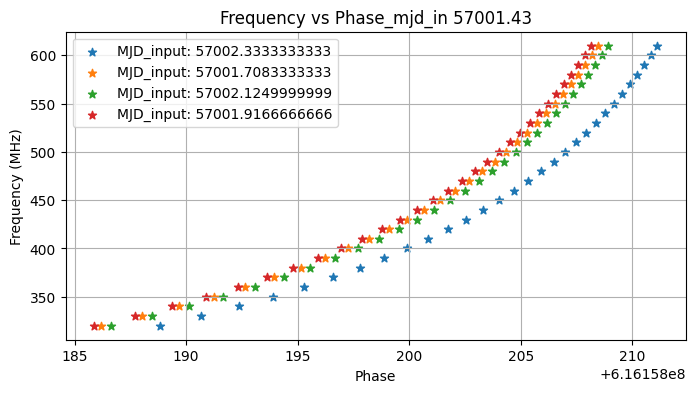

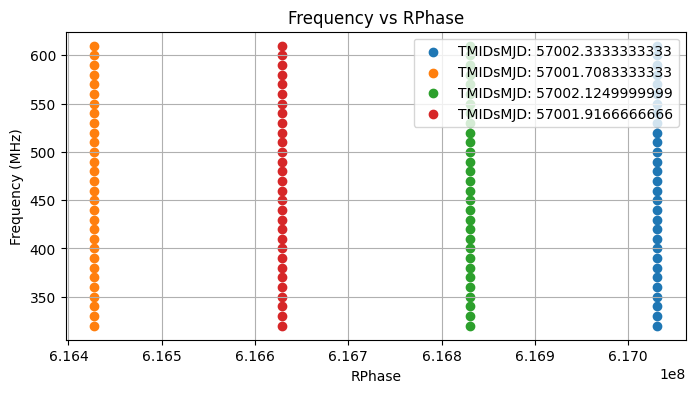

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


for i in range(len(frequencies)):
    freq_values_tmidmjd = output_pred[i][1]
    Rphase_values_tmidmjd = output_pred[i][5]
    phase_values_mjdin = output_pred[i][4]
    tmidmjd = output_pred[i][2]

unique_mjd_values = list(set(tmids))

#  Frequency vs Phase
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title(f'Frequency vs Phase_mjd_in {mjd_input}')
ax.set_ylabel('Frequency (MHz)')
ax.set_xlabel('Phase')
for mjd_value in unique_mjd_values:
    indices = [i for i, value in enumerate(tmids) if value == mjd_value]
    ax.scatter([phase_values_inputmjd[i] for i in indices], [freq_values[i] for i in indices], marker='*', label=f'MJD_input: {mjd_value}')
ax.legend()
ax.grid(True)
plt.savefig(f'Frequency vs Phase_mjd_in {mjd_input}.png')
plt.show()

#  Frequency vs RPhase
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title(f'Frequency vs RPhase')
ax.set_ylabel('Frequency (MHz)')
ax.set_xlabel('RPhase')
for mjd_value in unique_mjd_values:
    indices = [i for i, value in enumerate(tmids) if value == mjd_value]
    ax.scatter([Rphase_values[i] for i in indices], [freq_values[i] for i in indices], marker='o', label=f'TMIDsMJD: {mjd_value}')
ax.legend()
ax.grid(True)
plt.savefig(f'Frequency vs RPhase')
plt.show()


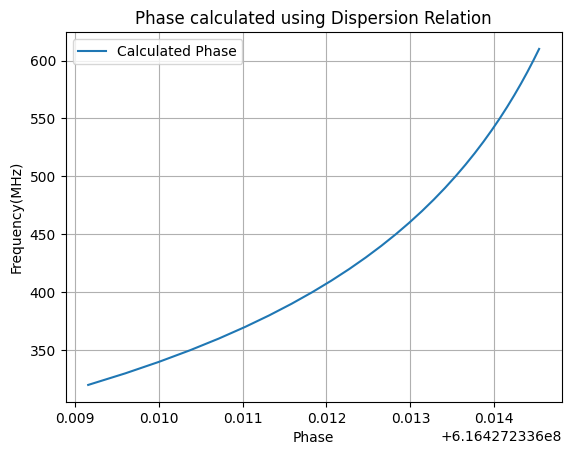

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function φ(t, f ) ≃ φ(t, f0 ) − ν(t, f0 ) (f ^−2 − f0^-2)D
def calculate_phase(f, f0, psi_t_f0, nu_t_f0, D):
    return psi_t_f0 - nu_t_f0 * (1/(f**2) - 1/(f0**2)) * D

# Assuming you have the following known values
f0 = 320  # Reference frequency 
psi_t_f0 =   616427233.609161 #616427255.903310(610MHz) #616427233.609161(320MHz) #Reference Phase  TMID_1
nu_t_f0 =   11.18793539999906# pulsar frequency ν(t, f0)
D =  67.844629# Pulsar DM 320MHz

# Generate some example frequency values
freq_values = np.arange(320,620,10)

# Calculate corresponding phase values using the defined function
phase_values = calculate_phase(freq_values, f0, psi_t_f0, nu_t_f0, D)

# Visualize the calculated values
plt.plot(phase_values,freq_values, label='Calculated Phase')
#plt.scatter(Rphase_values,freq_values,marker='*',label=f'MJD_input:{mjd_input}')   

plt.xlabel('Phase')
plt.ylabel('Frequency(MHz)')
plt.title('Phase calculated using Dispersion Relation')
plt.grid()
plt.legend()
plt.show()


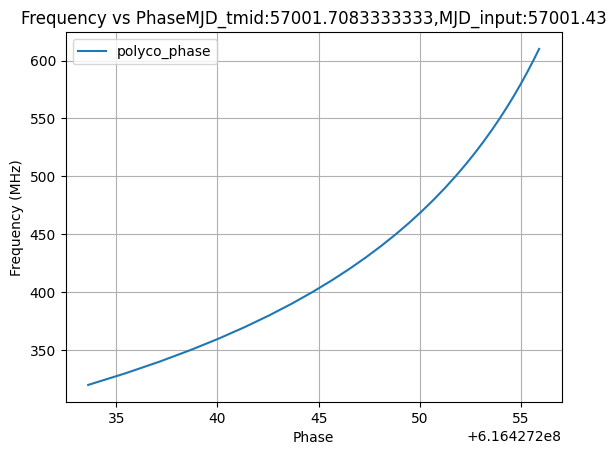

In [34]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
freq_values = []
Rphase_values = []
tmids = []
phase_values_tmid1=[]
# Your existing loop
for i in range(len(output_pred)):
    if i*len(df) < len(output_pred):
        freq_values_tmidmjd_1 = output_pred[i*(len(df))][1]
        phase_values_tmidmjd_1 = output_pred[i*len(df)][5]
        tmidmjd = output_pred[i*len(df)][2]
    #phase_values_mjdin = output_pred[i][4]
    #norm_phase_values_tmidmjd = output_pred[i][5]
    #tmidmjd = output_pred[i][2]
    
    # Append values to the lists
        freq_values.append(freq_values_tmidmjd_1)
        phase_values_tmid1.append(phase_values_tmidmjd_1)
        tmids.append(tmidmjd)

plt.plot(phase_values_tmid1,freq_values,label='polyco_phase')   
plt.title('Frequency vs Phase'f'MJD_tmid:{57001.7083333333},MJD_input:{mjd_input}')
plt.ylabel('Frequency (MHz)')
plt.xlabel('Phase')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#This was a trial attempt at finding DM for the obseved data #Does not seem to give right values

import numpy as np
# Define the observed data
observed_frequencies = freq_values
observed_phases = phase_values_tmid1

# Calculate the path difference (DM)
def calculate_dm(f, f0, psi_t_f0, nu_t_f0, observed_phase):
    return -1.0*(observed_phase - psi_t_f0) / (nu_t_f0 * (1/(f**2) - 1/(f0**2)))

# Assuming you have the following known values
f0 = 320  # Reference frequency
psi_t_f0 = 616427233.609161 #Reference Phase 
nu_t_f0 =   11.18793539999906# pulsar frequency ν(t, f0)

# Calculate DM for each observed frequency
dm_values = []
for f, observed_phase in zip(observed_frequencies, observed_phases):
    dm = calculate_dm(f, f0, psi_t_f0, nu_t_f0, observed_phase)
    dm_values.append(dm)

# Print the calculated DM values
print("Calculated DM values:", dm_values)

Calculated DM values: [nan, 281526.76310547494, 281526.69026143505, 281526.73511155124, 281526.7215957166, 281526.7093076193, 281526.71997589275, 281526.71892139316, 281526.72624532384, 281526.7111444553, 281526.715713204, 281526.7241076714, 281526.71557051915, 281526.71465197526, 281526.71454842534, 281526.71062265063, 281526.71778332384, 281526.71238445473, 281526.7202576413, 281526.718278984, 281526.7205785895, 281526.7188499625, 281526.7170234831, 281526.71385856665, 281526.7208449852, 281526.7201444891, 281526.71914485353, 281526.7193000128, 281526.7244193125, 281526.7248547284]


/tmp/ipykernel_5143/1820157298.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return -1.0*(observed_phase - psi_t_f0) / (nu_t_f0 * (1/(f**2) - 1/(f0**2)))


/tmp/ipykernel_5143/180381865.py:9: RuntimeWarning: invalid value encountered in scalar divide
  ratio_phase_diff = phase_diff_polyco_i/phase_diff_dispersion_i


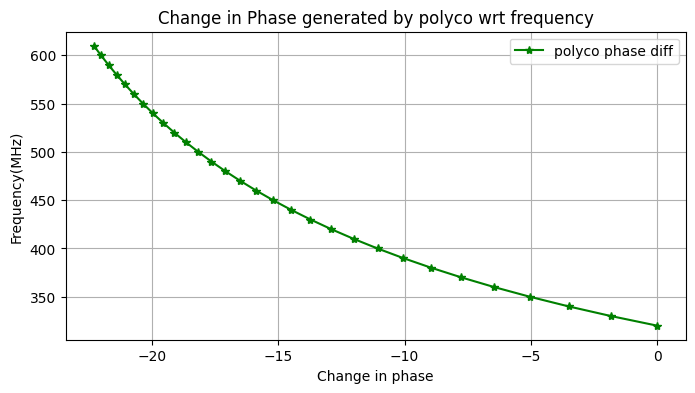

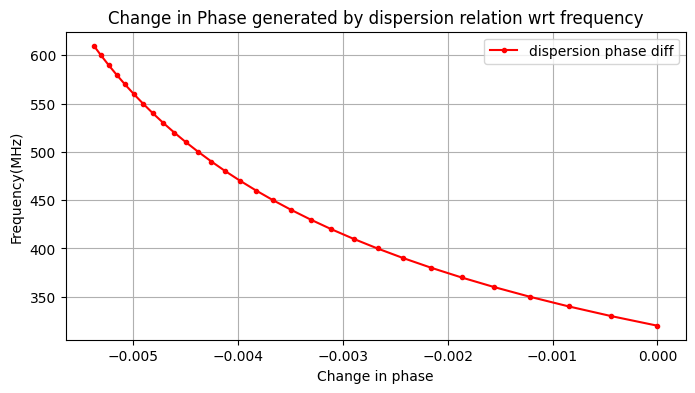

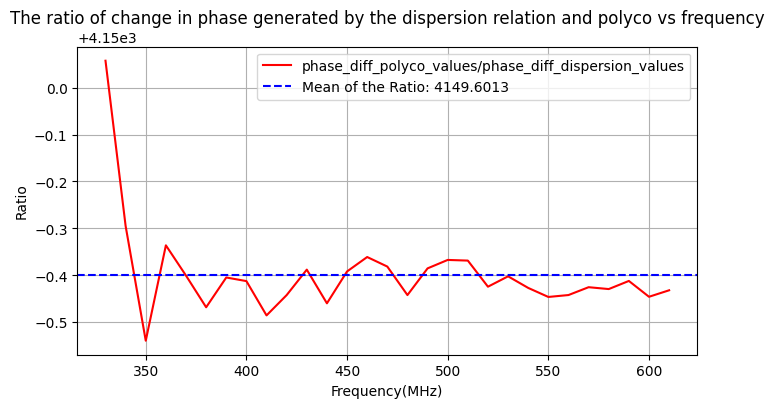

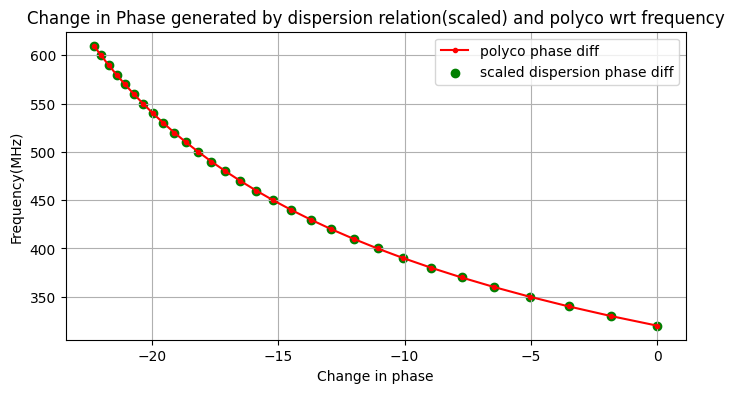

In [36]:
phase_diff_polyco_values= []
phase_diff_dispersion_values = []
phase_diff_dispersion_values_scaled = []
ratio_values = []

for i in range(len(phase_values_tmid1)):
    phase_diff_polyco_i = phase_values_tmid1[0]-phase_values_tmid1[i]
    phase_diff_dispersion_i = phase_values[0]-phase_values[i]
    ratio_phase_diff = phase_diff_polyco_i/phase_diff_dispersion_i
    phase_diff_polyco_values.append(phase_diff_polyco_i)
    phase_diff_dispersion_values.append(phase_diff_dispersion_i)
    phase_diff_dispersion_values_scaled.append(phase_diff_dispersion_i*4149.601306423068) # This number was take from the  mean of the phase ratio 
    ratio_values.append(ratio_phase_diff)



fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(phase_diff_polyco_values,freq_values,label='polyco phase diff',color='green',marker='*')  
ax.set_xlabel('Change in phase')
ax.set_ylabel('Frequency(MHz)')
ax.set_title('Change in Phase generated by polyco wrt frequency')

plt.grid()
plt.legend()
plt.savefig('Change in Phase generated by polyco wrt frequency.png')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(phase_diff_dispersion_values,freq_values,label='dispersion phase diff',color='red',marker='.') 
ax.set_xlabel('Change in phase')
ax.set_ylabel('Frequency(MHz)')
ax.set_title('Change in Phase generated by dispersion relation wrt frequency')

plt.grid()
plt.legend()
plt.savefig('Change in Phase generated by dispersion relation wrt frequency.png')


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(freq_values,ratio_values,label='phase_diff_polyco_values/phase_diff_dispersion_values',color='red') 
mean_ratio = np.nanmean(ratio_values) #normalization
ax.axhline(y=mean_ratio, color='blue', linestyle='--', label=f'Mean of the Ratio: {mean_ratio:.4f}')
ax.set_xlabel('Frequency(MHz)')
ax.set_ylabel('Ratio')
ax.set_title('The ratio of change in phase generated by the dispersion relation and polyco vs frequency')
plt.grid()
plt.legend()
plt.savefig('The ratio of change in phase generated by the dispersion relation and polyco vs frequency.png')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(phase_diff_polyco_values,freq_values,label='polyco phase diff',color='red',marker='.') 
ax.scatter(phase_diff_dispersion_values_scaled,freq_values,label='scaled dispersion phase diff',color='green',marker='o') 
ax.set_xlabel('Change in phase')
ax.set_ylabel('Frequency(MHz)')
ax.set_title('Change in Phase generated by dispersion relation(scaled) and polyco wrt frequency')
plt.grid()
plt.legend()
plt.savefig('Change in Phase generated by dispersion relation(scaled) and polyco wrt frequency.png')


In [27]:
mean_ratio

4149.601306423068

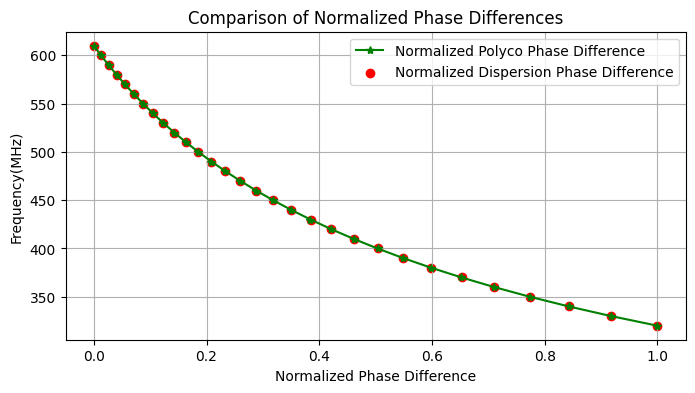

In [31]:
#phase values
phase_diff_polyco_values = []
phase_diff_dispersion_values = []

# phase difference for each frequency
for i in range(len(phase_values_tmid1)):
    phase_diff_polyco_i = phase_values_tmid1[0] - phase_values_tmid1[i] #this is for 320MHz, which is used as the reference frequency in dispersion
    phase_diff_dispersion_i = phase_values[0] - phase_values[i] #"..."
    phase_diff_polyco_values.append(phase_diff_polyco_i)
    phase_diff_dispersion_values.append(phase_diff_dispersion_i)

# scaling factors
min_polyco = min(phase_diff_polyco_values)
max_polyco = max(phase_diff_polyco_values)
min_disp = min(phase_diff_dispersion_values)
max_disp = max(phase_diff_dispersion_values)

#normalization using min-max scaling
normalized_polyco = [(x - min_polyco) / (max_polyco - min_polyco) for x in phase_diff_polyco_values]
normalized_disp = [(x - min_disp) / (max_disp - min_disp) for x in phase_diff_dispersion_values]

# Plot the normalized phase differences
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(normalized_polyco,freq_values, label='Normalized Polyco Phase Difference', color='green', marker='*')
ax.scatter(normalized_disp,freq_values,label='Normalized Dispersion Phase Difference', color='red', marker='o')
ax.set_xlabel('Normalized Phase Difference')
ax.set_ylabel('Frequency(MHz)')
ax.set_title('Comparison of Normalized Phase Differences')
plt.grid()
plt.legend()
plt.savefig('Comparison of Normalized Phase Differences.png')


In [75]:
max_disp - min_disp

0.00537264347076416

In [74]:
max_polyco - min_polyco

22.294148921966553

In [77]:
(max_polyco - min_polyco)/(max_disp - min_disp) #This is close to the Scaling Factor used above giving hints as to why it worked 

4149.567906987064

In [72]:
min_disp/max_disp - min_disp

0.0

In [60]:
np.nanmean(ratio_values)

4149.5308783574865

In [52]:
len(phase_diff_dispersion_values)

30

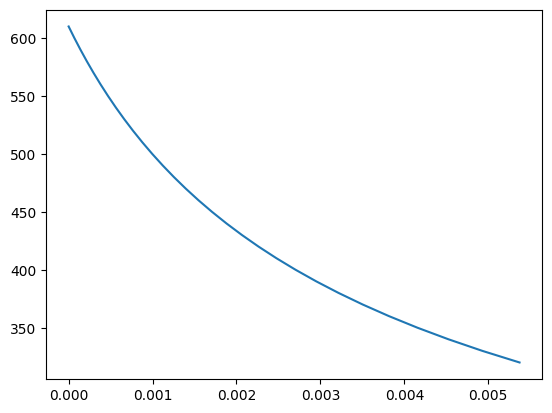

In [39]:
diff_1_disp = []
diff_2_disp = []
for i in range(len(phase_values_tmid1)):
    phase_diff_1 = phase_values[29]-phase_values[i]
    phase_diff_2 = abs(phase_values[0]-phase_values[i])
    diff_1_disp.append(phase_diff_1)
    diff_2_disp.append(phase_diff_2)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(diff_1_disp,freq_values,label='polyco_phase',color = 'green')  
ax.plot() 


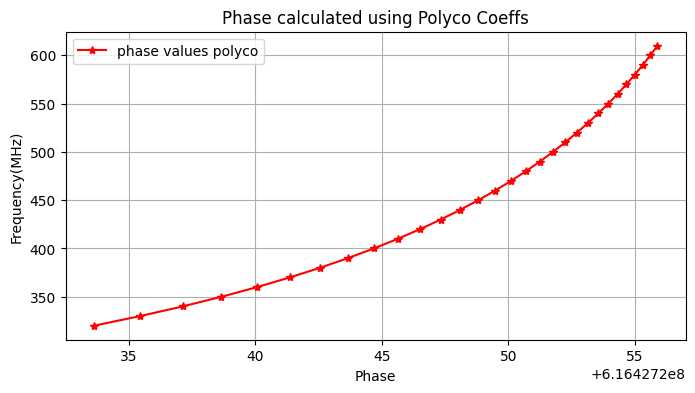

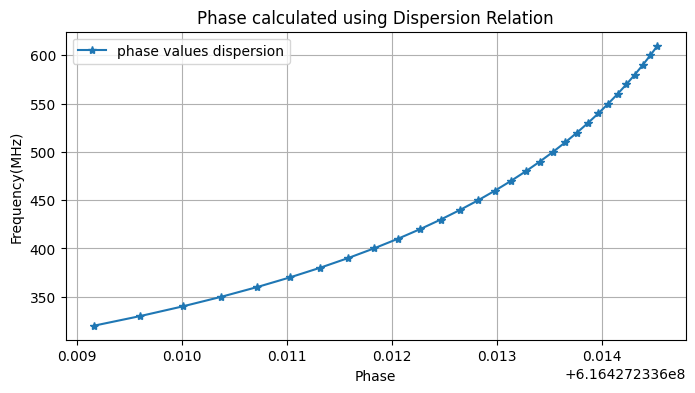

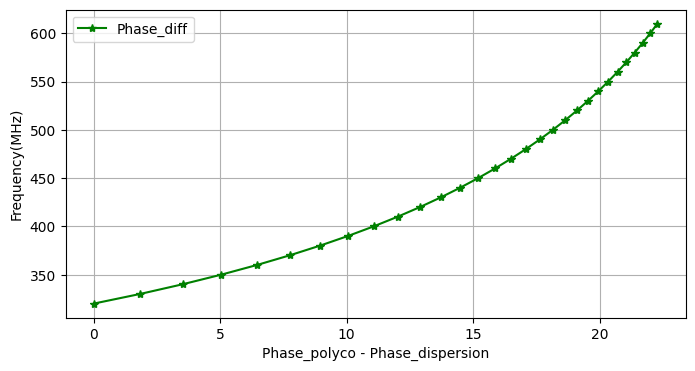

In [15]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the first set of phase values
ax.plot(phase_values_tmid1,freq_values, marker='*',color='r',label='phase values polyco')
ax.set_xlabel('Phase')
ax.set_ylabel('Frequency(MHz)')
ax.set_title('Phase calculated using Polyco Coeffs')
ax.grid()
ax.legend()
plt.savefig('Phase calculated using Polyco Coeffs.png')
plt.show()

# Plot the second set of phase values
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(phase_values,freq_values, marker='*', label='phase values dispersion')
ax.set_xlabel('Phase')
ax.set_ylabel('Frequency(MHz)')
ax.set_title('Phase calculated using Dispersion Relation')
ax.grid()
ax.legend()
plt.savefig('Phase calculated using Dispersion Relation.png')
plt.show()

# Calculate the differences
diffe = [phase_values_tmid1[i] - phase_values[i] for i in range(len(phase_values))]

# Plot the third set of differences
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(diffe, freq_values, marker='*',color='g', label='Phase_diff')
ax.set_xlabel('Phase_polyco - Phase_dispersion')
ax.set_ylabel('Frequency(MHz)')
ax.grid()
ax.legend()
plt.savefig('Phase_polyco - Phase_dispersion.png')
plt.show()

